# Business Scenario
    A fintech company provides instant credit limits to customers using a mobile app.
    Instead of using complex models, the company wants a similarity-based system that works like:
    “Show me customers similar to this new customer, and decide risk accordingly.”
    Challenges:
    Customers are not easily separable by straight lines
    Decisions depend on nearness, not formulas
    Feature scale (income vs age) matters a lot
    The system must be interactive and explainable
    
    •  Load the dataset and explore customer attributes such as:
    Age
    Income
    Loan amount
    Credit history
    •  Identify which features should be used to measure customer similarity.
    
    • Prepare the data so that distance-based comparison is meaningful.
    • Explain why preprocessing is necessary for this algorithm.
    •  Build a classification model that:
    Assigns a customer to High Risk or Low Risk
    Makes decisions based on nearest neighbors
    •  Train the model using historical customer data.
    •  Experiment with different values of K.
 

In [115]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import joblib

In [91]:
df = pd.read_csv(r'C:\Users\KIRAN\OneDrive\Desktop\CSV Files\credit_risk_dataset.csv')

In [92]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [94]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [95]:
df.describe(include=object)

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


In [96]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

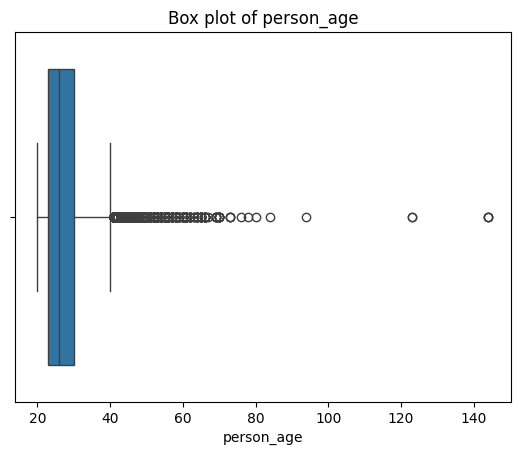

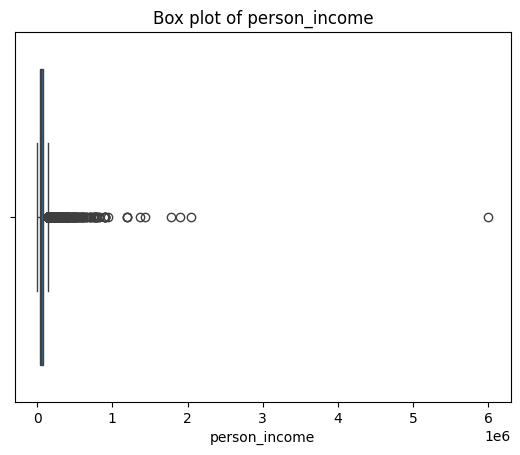

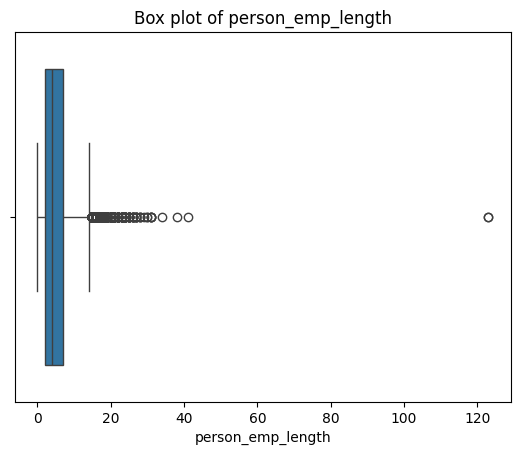

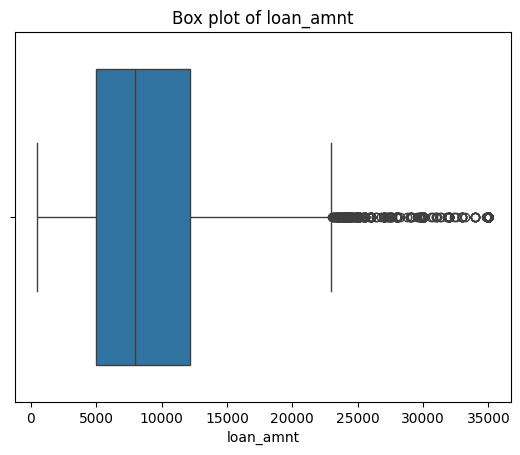

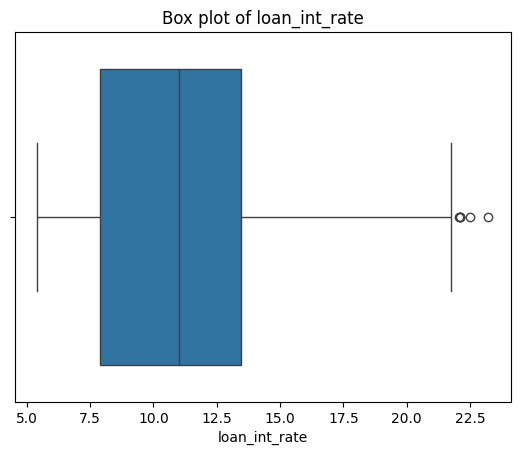

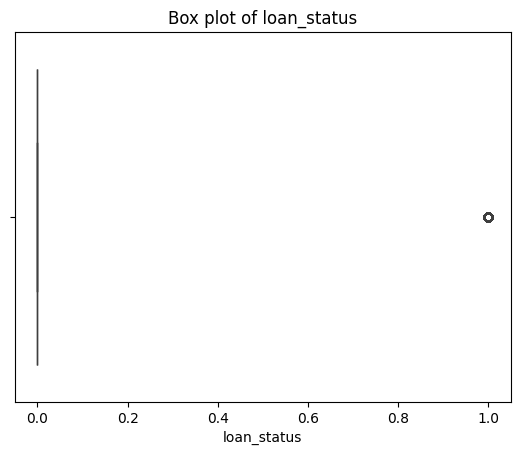

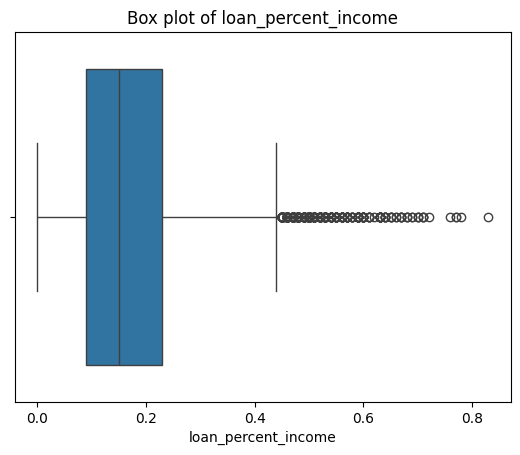

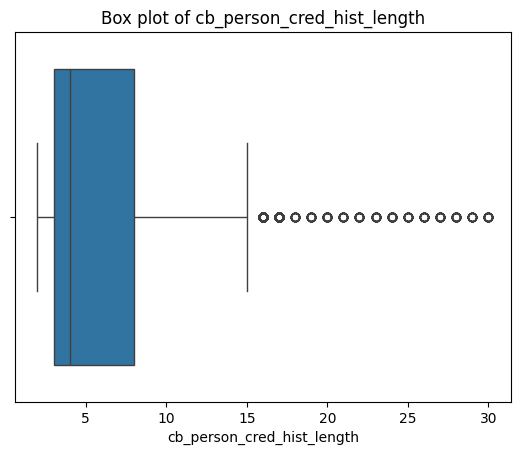

In [97]:
# outlier detection using the box plot
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

In [98]:
## getting the percentage of outliers in each numerical column
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_percentage = (len(outliers) / len(df)) * 100
    print(f'Percentage of outliers in {col}: {outlier_percentage:.2f}%')

Percentage of outliers in person_age: 4.59%
Percentage of outliers in person_income: 4.55%
Percentage of outliers in person_emp_length: 2.62%
Percentage of outliers in loan_amnt: 5.18%
Percentage of outliers in loan_int_rate: 0.02%
Percentage of outliers in loan_status: 21.82%
Percentage of outliers in loan_percent_income: 2.00%
Percentage of outliers in cb_person_cred_hist_length: 3.51%


In [99]:
## deleting the outliers which are less than 6% percentage
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_percentage = (len(outliers) / len(df)) * 100
    if outlier_percentage < 6:
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [100]:
## getting the percentage of outliers in each numerical column
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_percentage = (len(outliers) / len(df)) * 100
    print(f'Percentage of outliers in {col}: {outlier_percentage:.2f}%')

Percentage of outliers in person_age: 2.46%
Percentage of outliers in person_income: 1.39%
Percentage of outliers in person_emp_length: 0.00%
Percentage of outliers in loan_amnt: 0.43%
Percentage of outliers in loan_int_rate: 0.00%
Percentage of outliers in loan_status: 20.11%
Percentage of outliers in loan_percent_income: 0.93%
Percentage of outliers in cb_person_cred_hist_length: 0.00%


In [101]:
## getting the percentage of outliers in each numerical column
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_percentage = (len(outliers) / len(df)) * 100
    print(f'Percentage of outliers in {col}: {outlier_percentage:.2f}%')

Percentage of outliers in person_age: 2.46%
Percentage of outliers in person_income: 1.39%
Percentage of outliers in person_emp_length: 0.00%
Percentage of outliers in loan_amnt: 0.43%
Percentage of outliers in loan_int_rate: 0.00%
Percentage of outliers in loan_status: 20.11%
Percentage of outliers in loan_percent_income: 0.93%
Percentage of outliers in cb_person_cred_hist_length: 0.00%


In [102]:
print(df['loan_status'].value_counts(normalize=True))

loan_status
0    0.798869
1    0.201131
Name: proportion, dtype: float64


In [103]:
## getting the percentage of outliers in each numerical column
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_percentage = (len(outliers) / len(df)) * 100
    print(f'Percentage of outliers in {col}: {outlier_percentage:.2f}%')

Percentage of outliers in person_age: 2.46%
Percentage of outliers in person_income: 1.39%
Percentage of outliers in person_emp_length: 0.00%
Percentage of outliers in loan_amnt: 0.43%
Percentage of outliers in loan_int_rate: 0.00%
Percentage of outliers in loan_status: 20.11%
Percentage of outliers in loan_percent_income: 0.93%
Percentage of outliers in cb_person_cred_hist_length: 0.00%


In [104]:
## handling missing values
df = df.dropna()

In [105]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [106]:
df['person_age'].max()

np.int64(40)

In [107]:
# Feature Engineering
# taking only the necessary columns for modeling
feature_cols = ['person_age','person_income','loan_amnt','cb_person_cred_hist_length']
X = df[feature_cols]
y = df['loan_status']

In [108]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [109]:
# model training
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
knn.fit(X_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [110]:
y_pred = knn.predict(X_test)

In [111]:
accuracy_score(y_test, y_pred)

0.8266415422525004

In [112]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[5111,  409],
       [ 787,  592]])

In [118]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<Axes: >

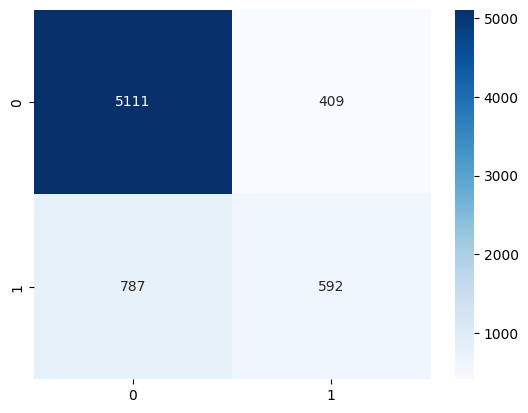

In [113]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [119]:
joblib.dump(knn, 'knn_model.pkl')
joblib.dump(feature_cols, 'features.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("✅ Files saved! Run streamlit run app.py now.")

✅ Files saved! Run streamlit run app.py now.
